In [1]:
!pip install zipfile36
import zipfile36 as zipfile

try:
       with zipfile.ZipFile("/content/Yolo__Data.zip", 'r') as zip_ref:
           zip_ref.extractall("/content")
except zipfile.BadZipFile as e:
       print(f"Error: {e}")
       print("Attempting to repair the zip file...")
       zipfile36.ZipFile.repair("/content/Yolo__Data.zip")
       print("Repair attempt complete. Try extracting again.")

In [20]:
!pip install ultralytics

In [3]:
!pip install keras-cv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 40.4 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import cv2
from tqdm.notebook import tqdm
from PIL import Image
import cv2
import ultralytics
from ultralytics import YOLO
import numpy as np
import random

#tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import *
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import *
import keras_cv

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import seaborn as sns

#
import wandb
wandb.init(mode="disabled")
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
train_path='/content/Yolo__Data/train'
test_path='/content/Yolo__Data/test'
val_path='/content/Yolo__Data/val'

In [6]:
train_images = os.listdir(train_path+'/images')
test_images = os.listdir(test_path+'/images')
val_images = os.listdir(val_path+'/images')
train_labels = os.listdir(train_path+'/labels')
test_labels = os.listdir(test_path+'/labels')
val_labels = os.listdir(val_path+'/labels')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_val_images = len(val_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)
num_val_labels = len(val_labels)

print('images train: ',num_train_images,', images test: ', num_test_images,', images val: ', num_val_images, )
print('labels train: ',num_train_labels,', labels test: ', num_test_labels,', labels val: ', num_val_labels, )

images train:  184 , images test:  33 , images val:  24
labels train:  184 , labels test:  33 , labels val:  24


In [7]:
def train_val_generators(train_dir, validation_dir, test_dir):
  train_datagen = ImageDataGenerator(rescale=1./255.)

  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
  validation_datagen = ImageDataGenerator(rescale=1./255.)
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                              batch_size=16,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))
  test_datagen = ImageDataGenerator(rescale=1./255.)
  test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
  return train_generator, validation_generator, test_generator

In [8]:
training_dir='/content/Yolo__Data/train'
validation_dir='/content/Yolo__Data/val'
test_dir='/content/Yolo__Data/test'
train_generator, validation_generator, test_generator = train_val_generators(training_dir, validation_dir, test_dir)

Found 184 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


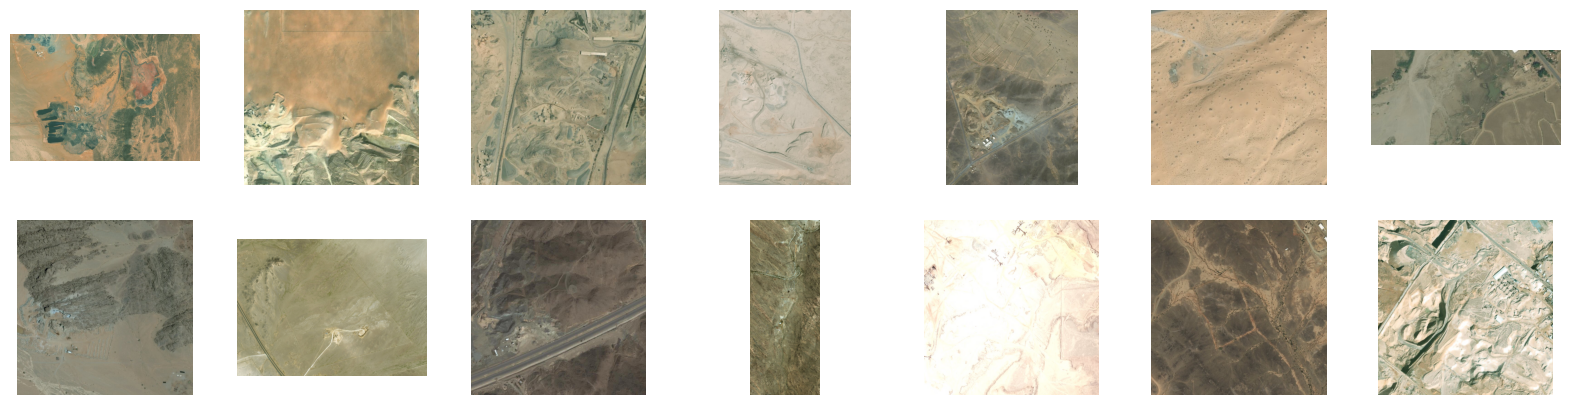

In [9]:
plt.figure(figsize=(20, 5))
for i,c in enumerate(np.random.randint(0,len(train_images),size=14),start=1):
  plt.subplot(2,7,i)
  # im=plt.imshow(mpimg.imread(train_path+'/images/'+train_images[c])) # Removed this line
  # plt.imshow(im , cmap='gray') # Removed this line
  # Directly display the image using mpimg.imread with cmap='gray'
  plt.imshow(mpimg.imread(train_path+'/images/'+train_images[c]), cmap='gray')
  plt.axis('off')
plt.show()

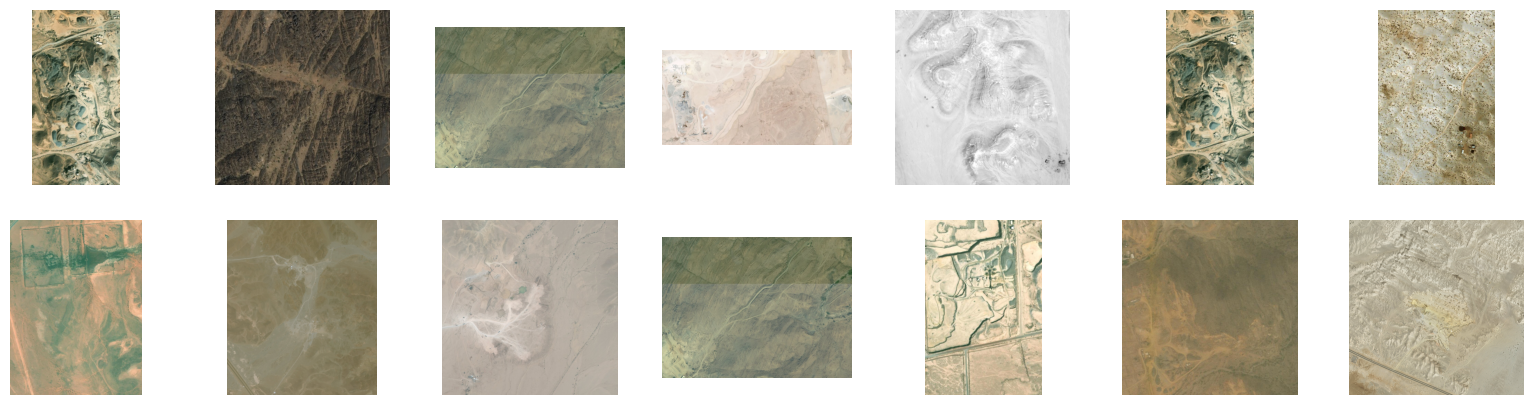

In [10]:
plt.figure(figsize=(20, 5))
for i,c in enumerate(np.random.randint(0,len(test_images),size=14),start=1):
  plt.subplot(2,7,i)
  plt.imshow(mpimg.imread(test_path+'/images/'+test_images[c]),cmap='gray')
  plt.axis('off')

plt.show()

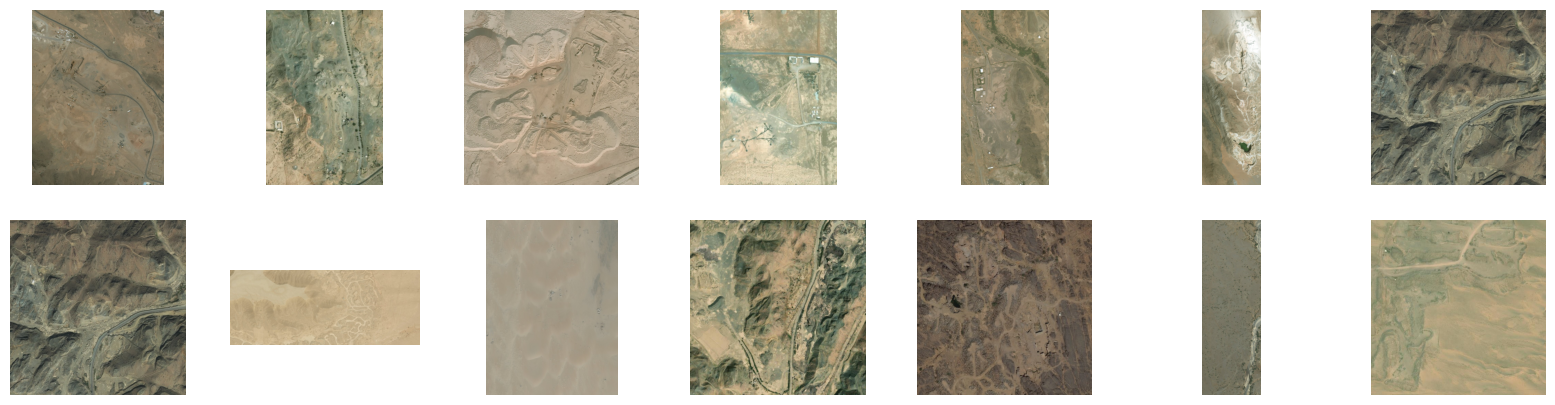

In [11]:
plt.figure(figsize=(20, 5))
for i,c in enumerate(np.random.randint(0,len(val_images),size=14),start=1):
  plt.subplot(2,7,i)
  plt.imshow(mpimg.imread(val_path+'/images/'+val_images[c]),cmap='gray')
  plt.axis('off')

plt.show()

In [14]:
model=YOLO('yolov8n.yaml')

In [22]:
results=model.train(data=('/content/Yolo__Data/data.yaml'),epochs=40, imgsz=640)

Ultralytics 8.3.71 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Yolo__Data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 32.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Yolo__Data/train/labels... 184 images, 0 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:01<00:00, 111.90it/s]

train: New cache created: /content/Yolo__Data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Yolo__Data/val/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 48.33it/s] 

val: New cache created: /content/Yolo__Data/val/labels.cache
Plotting labels to runs/detect/train7/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      5.264      45.17      3.834         99        640: 100%|██████████| 12/12 [03:13<00:00, 16.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.12s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      5.276      34.75      4.051         81        640: 100%|██████████| 12/12 [03:01<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.04s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      5.759      29.36      3.615        360        640: 100%|██████████| 12/12 [03:07<00:00, 15.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.77s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      5.106      13.54      3.222        118        640: 100%|██████████| 12/12 [03:14<00:00, 16.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.59s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      4.294       7.88      2.612         60        640: 100%|██████████| 12/12 [03:05<00:00, 15.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.26s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      4.207      6.007      2.205        170        640: 100%|██████████| 12/12 [02:58<00:00, 14.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.36s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      4.152      4.869      1.966        116        640: 100%|██████████| 12/12 [03:02<00:00, 15.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.95s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      3.888      4.252      1.694        125        640: 100%|██████████| 12/12 [02:57<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.39s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      3.761      4.219      1.628         82        640: 100%|██████████| 12/12 [02:57<00:00, 14.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.98s/it]

                   all         24        393          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      3.751      3.754      1.593        290        640: 100%|██████████| 12/12 [03:10<00:00, 15.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.03s/it]

                   all         24        393   0.000417    0.00763    0.00121   0.000336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      3.552      3.584      1.532        161        640: 100%|██████████| 12/12 [03:03<00:00, 15.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.61s/it]

                   all         24        393      0.317     0.0178     0.0156    0.00279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G       3.56      3.195       1.42         69        640: 100%|██████████| 12/12 [03:04<00:00, 15.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.73s/it]

                   all         24        393       0.17     0.0254      0.029     0.0058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      3.588      3.482      1.524         84        640: 100%|██████████| 12/12 [02:58<00:00, 14.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.47s/it]

                   all         24        393      0.142     0.0382     0.0207    0.00501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G       3.56      3.238      1.458        172        640: 100%|██████████| 12/12 [02:47<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.41s/it]

                   all         24        393      0.181     0.0662     0.0344     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      3.493      3.173      1.441         77        640: 100%|██████████| 12/12 [02:55<00:00, 14.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.98s/it]

                   all         24        393       0.19     0.0585     0.0392     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      3.323      2.877      1.396        110        640: 100%|██████████| 12/12 [03:04<00:00, 15.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:20<00:00, 20.23s/it]

                   all         24        393      0.188     0.0636     0.0434     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      3.337      2.904      1.387        157        640: 100%|██████████| 12/12 [02:52<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.84s/it]

                   all         24        393      0.247     0.0763      0.054     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G       3.43      2.786      1.431        162        640: 100%|██████████| 12/12 [03:00<00:00, 15.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.50s/it]

                   all         24        393      0.218     0.0738     0.0464     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      3.375      2.999      1.429         99        640: 100%|██████████| 12/12 [02:59<00:00, 14.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.75s/it]

                   all         24        393      0.228     0.0738     0.0589     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      3.318        2.6      1.289        156        640: 100%|██████████| 12/12 [02:54<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.38s/it]

                   all         24        393      0.254      0.084     0.0638     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      3.346      2.732      1.334         86        640: 100%|██████████| 12/12 [03:05<00:00, 15.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.79s/it]

                   all         24        393      0.221     0.0712     0.0562     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      3.292      2.636      1.431        111        640: 100%|██████████| 12/12 [02:59<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.11s/it]

                   all         24        393      0.223     0.0738      0.058     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      3.251      2.749      1.382        369        640: 100%|██████████| 12/12 [03:03<00:00, 15.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.16s/it]

                   all         24        393      0.263      0.107     0.0726     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      3.331      2.724      1.366        133        640: 100%|██████████| 12/12 [03:00<00:00, 15.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.45s/it]

                   all         24        393      0.251     0.0814     0.0561     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      3.349      2.582      1.274        435        640: 100%|██████████| 12/12 [03:11<00:00, 15.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.25s/it]

                   all         24        393      0.214     0.0839     0.0589     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      3.315      2.589      1.317        317        640: 100%|██████████| 12/12 [02:54<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.25s/it]

                   all         24        393      0.245     0.0992     0.0713     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      3.155      2.419      1.298         68        640: 100%|██████████| 12/12 [02:55<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.80s/it]

                   all         24        393      0.236     0.0992     0.0814     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      3.033      2.375      1.316         98        640: 100%|██████████| 12/12 [02:56<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.72s/it]

                   all         24        393      0.197       0.13     0.0795     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      3.158      2.448      1.309        149        640: 100%|██████████| 12/12 [02:54<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.55s/it]

                   all         24        393      0.201       0.14     0.0865     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      3.159      2.385      1.325        132        640: 100%|██████████| 12/12 [02:58<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.35s/it]

                   all         24        393       0.21      0.104     0.0739     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      3.247      2.521      1.311        120        640: 100%|██████████| 12/12 [02:58<00:00, 14.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.23s/it]

                   all         24        393       0.22     0.0992     0.0639     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      3.115      2.368      1.244        140        640: 100%|██████████| 12/12 [03:00<00:00, 15.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.70s/it]

                   all         24        393      0.232      0.117     0.0651     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G       3.08      2.388      1.241         86        640: 100%|██████████| 12/12 [02:55<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.90s/it]

                   all         24        393      0.225       0.12     0.0725     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      3.118       2.39      1.359         93        640: 100%|██████████| 12/12 [03:00<00:00, 15.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.36s/it]

                   all         24        393      0.224      0.125     0.0858     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      3.083      2.395      1.311         82        640: 100%|██████████| 12/12 [03:00<00:00, 15.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.17s/it]

                   all         24        393       0.21      0.127     0.0842     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      3.031      2.202      1.227        108        640: 100%|██████████| 12/12 [02:54<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.28s/it]

                   all         24        393      0.245      0.122     0.0843      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      3.074      2.192      1.183        218        640: 100%|██████████| 12/12 [02:55<00:00, 14.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.93s/it]

                   all         24        393      0.283      0.125     0.0926     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      3.006       2.24      1.254        140        640: 100%|██████████| 12/12 [02:50<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.75s/it]

                   all         24        393      0.273      0.136     0.0996     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      2.971      2.054      1.202        136        640: 100%|██████████| 12/12 [03:03<00:00, 15.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 18.00s/it]

                   all         24        393      0.241       0.12     0.0768      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      3.081       2.29      1.221        108        640: 100%|██████████| 12/12 [02:56<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.29s/it]

                   all         24        393       0.26      0.102     0.0729      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      3.053      2.072      1.203         79        640: 100%|██████████| 12/12 [02:58<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.01s/it]

                   all         24        393      0.304      0.122      0.089     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      2.946      2.103      1.234        146        640: 100%|██████████| 12/12 [02:58<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.96s/it]

                   all         24        393       0.25       0.13      0.102     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      2.919        2.2      1.237         78        640: 100%|██████████| 12/12 [02:56<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.26s/it]

                   all         24        393      0.181      0.107     0.0797     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G       3.07      2.144      1.245        105        640: 100%|██████████| 12/12 [03:02<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.12s/it]

                   all         24        393      0.262       0.13     0.0877     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      2.918      2.075      1.225        115        640: 100%|██████████| 12/12 [03:02<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.12s/it]

                   all         24        393      0.273      0.125     0.0888      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      2.912      2.168      1.176         89        640: 100%|██████████| 12/12 [02:52<00:00, 14.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.35s/it]

                   all         24        393       0.31      0.135      0.103      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      2.907      2.167      1.206        113        640: 100%|██████████| 12/12 [02:55<00:00, 14.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.20s/it]

                   all         24        393      0.305      0.115      0.105     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      2.888      2.115       1.26        142        640: 100%|██████████| 12/12 [03:01<00:00, 15.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.51s/it]

                   all         24        393      0.221      0.148      0.103     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.887      2.074      1.214         88        640: 100%|██████████| 12/12 [03:01<00:00, 15.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.41s/it]

                   all         24        393      0.253      0.132      0.088     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.974      2.006      1.152         86        640: 100%|██████████| 12/12 [02:57<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.32s/it]

                   all         24        393      0.261      0.132     0.0927     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      2.962      2.098      1.217        100        640: 100%|██████████| 12/12 [03:01<00:00, 15.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.08s/it]

                   all         24        393      0.329       0.12     0.0971     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      2.827      2.091      1.177         49        640: 100%|██████████| 12/12 [02:58<00:00, 14.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.39s/it]

                   all         24        393      0.273      0.115     0.0963     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      2.848      2.058      1.194         77        640: 100%|██████████| 12/12 [03:09<00:00, 15.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.01s/it]

                   all         24        393      0.279      0.127      0.102     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      2.845      2.027      1.219        119        640: 100%|██████████| 12/12 [02:51<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.88s/it]

                   all         24        393      0.319       0.13      0.108     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.962      2.139      1.169        183        640: 100%|██████████| 12/12 [03:03<00:00, 15.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.70s/it]

                   all         24        393      0.349      0.142      0.121     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      2.876      1.967        1.2        237        640: 100%|██████████| 12/12 [03:11<00:00, 15.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.54s/it]

                   all         24        393        0.3      0.145      0.108     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      2.789      1.989      1.137        140        640:  58%|█████▊    | 7/12 [02:02<01:27, 17.50s/it]


KeyboardInterrupt: 

In [25]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train7/weights/last.pt')
model.save("Building_detection _drone_model.pt")

In [12]:
model.save("Building_detection _drone_model.pt")


In [26]:
import cv2

In [30]:
image_input=cv2.imread('/content/Yolo__Data/test/images/1055_Expired_Notified_Building_1_2017.png')

In [34]:
results = model.predict(source=image_input,conf=0.15,save=True)


0: 640x480 2 buildings, 203.3ms
Speed: 6.3ms preprocess, 203.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [35]:
results[0].boxes.xyxy

tensor([[467.7611, 682.4274, 486.0551, 698.0447],
        [478.4771, 726.7772, 492.5067, 745.2985]])

In [36]:
results[0].boxes.conf

tensor([0.2731, 0.1693])

In [37]:
results[0].boxes.cls

tensor([0., 0.])

In [38]:
classNames = ["building"]

In [39]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [40]:
!pip install cvzone
!pip install opencv-python

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=4366a3d480ce14396a848835fc39176dd05cfcf5b79e529921e88db564b0687f
  Stored in directory: /root/.cache/pip/wheels/ab/36/ec/47be2d4e59dc4289e684d5b0dde54d1e72e51a614e57690e85
Successfully built cvzone


In [41]:
import cv2
import cvzone
import math
from IPython.display import Image

In [42]:
results = model(image_input, stream=True)
for r in results:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        w, h = x2-x1, y2-y1
        cvzone.cornerRect(image_input, (x1, y1, w, h))

        conf = math.ceil((box.conf[0]*100))/100

        cls = box.cls[0]
        name = classNames[int(cls)]

        cvzone.putTextRect(image_input, f'{name} 'f'{conf}', (max(0,x1), max(35,y1)), scale = 0.5)

cv2.imwrite('output.jpg', image_input)


0: 640x480 1 building, 763.1ms
Speed: 12.1ms preprocess, 763.1ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 480)


True

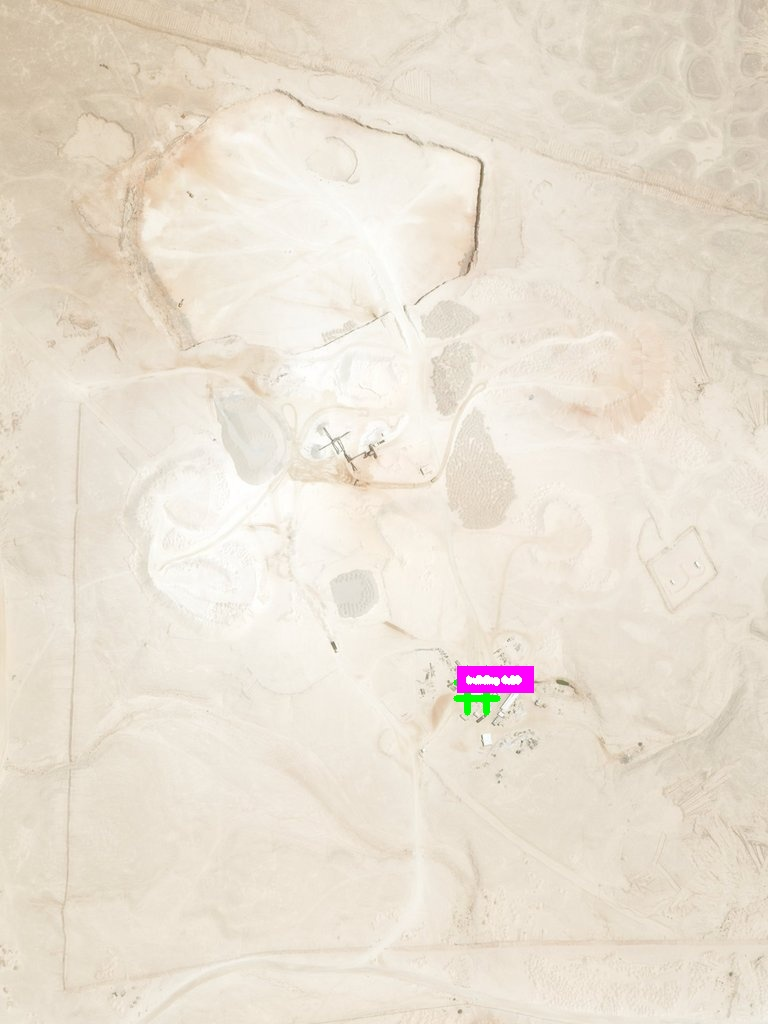

In [43]:
Image("/content/output.jpg")

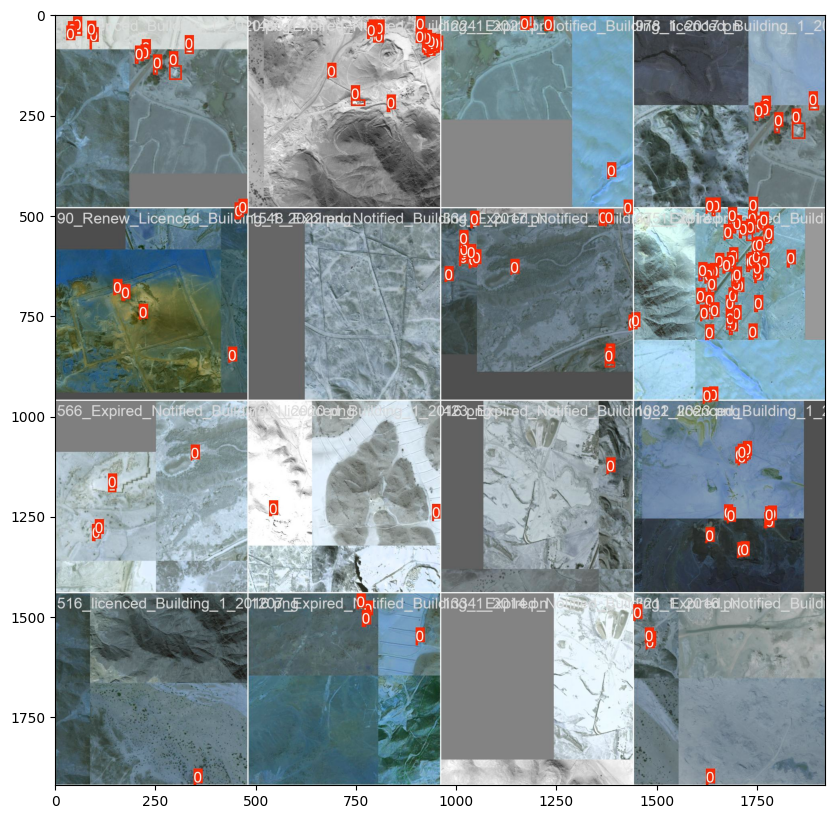

In [45]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/runs/detect/train7/train_batch1.jpg')
plt.imshow(img)
plt.show()

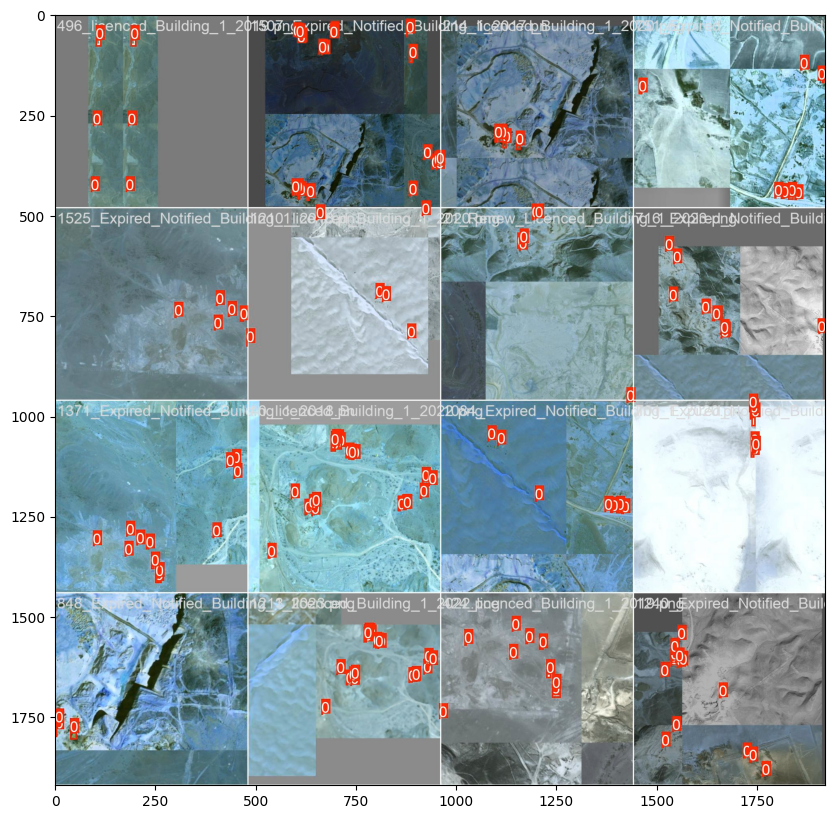

In [46]:
plt.figure(figsize=(20, 10))
img = cv2.imread('/content/runs/detect/train7/train_batch0.jpg')
plt.imshow(img)
plt.show()

In [48]:
def building_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x448 1 building, 300.5ms
Speed: 5.1ms preprocess, 300.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)

0: 640x640 2 buildings, 581.1ms
Speed: 14.3ms preprocess, 581.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 479.4ms
Speed: 13.1ms preprocess, 479.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x576 (no detections), 619.9ms
Speed: 25.8ms preprocess, 619.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 576)

0: 640x480 (no detections), 201.1ms
Speed: 6.0ms preprocess, 201.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

0: 640x448 (no detections), 181.0ms
Speed: 4.8ms preprocess, 181.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)

0: 640x576 2 buildings, 214.6ms
Speed: 7.7ms preprocess, 214.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 576)

0: 640x448 5 buildings, 172.2ms
Speed: 5.6ms preprocess, 172.2ms

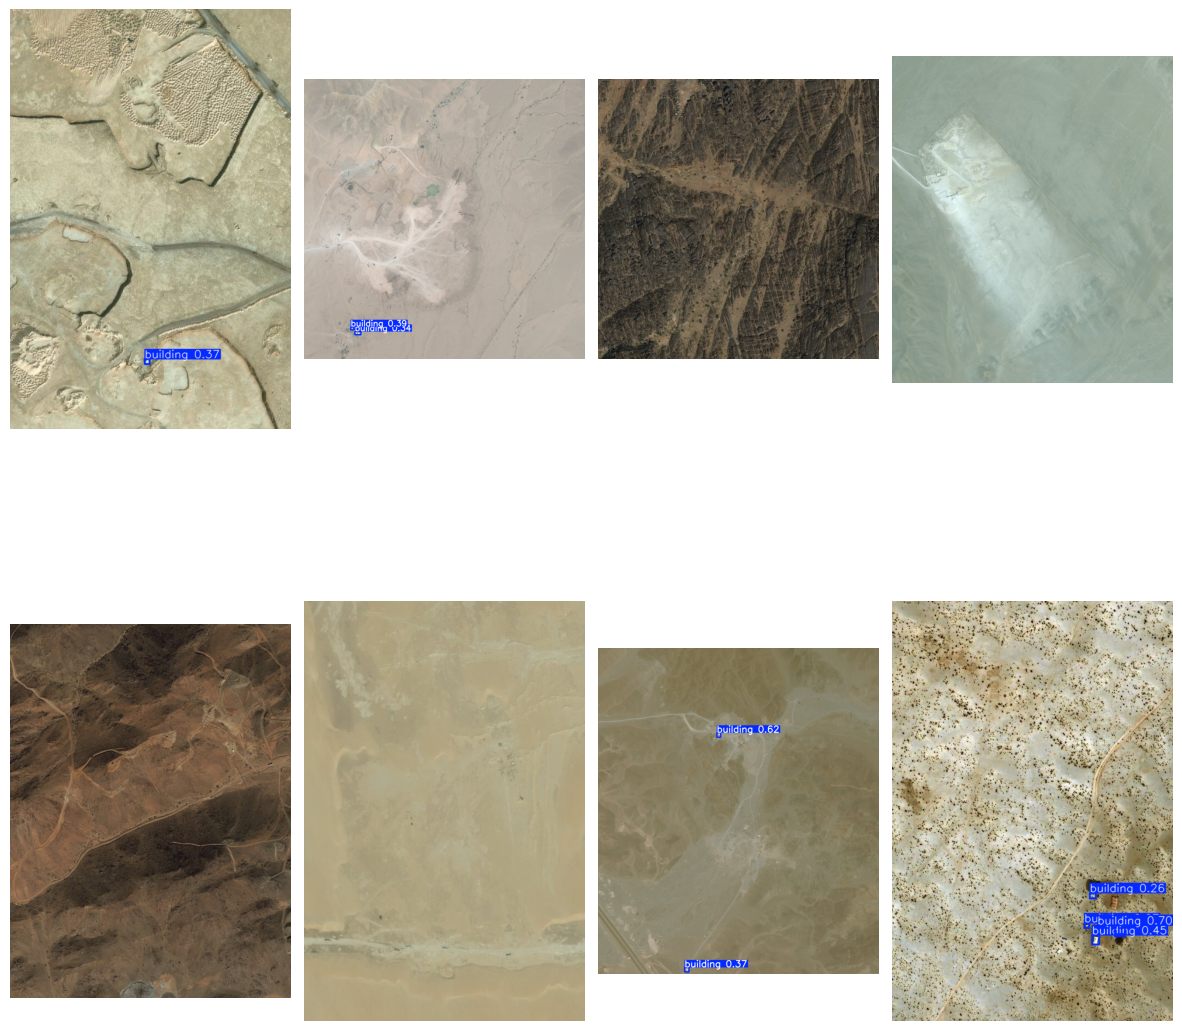

In [51]:
import random

custom_image_dir = '/content/Yolo__Data/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 8)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    # Call the correct function name: building_detect
    detect_img = building_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)